# Data Analysis
#### The following is the confusion matrix using: 
    - Training set: All hand-drawn training images + ground truths from problem images (0-350), 
        but controlled to max 600 samples per class picked starting from base dataset
    - Test set: Ground truths from problem images (350-706) only
##### Class 23 "random alphabets" ground truths were ignored (assume perfect segmentation)

In [1]:
#Data Initialization
confusion_matrix_index = 2
from data_analysis_data import ground_truth_list_2 as ground_truth_list
from data_analysis_data import prediction_list_2 as prediction_list
#Add base data for confusion matrix
for i in range(64):
    ground_truth_list.append(i)
    prediction_list.append(i)

Using TensorFlow backend.


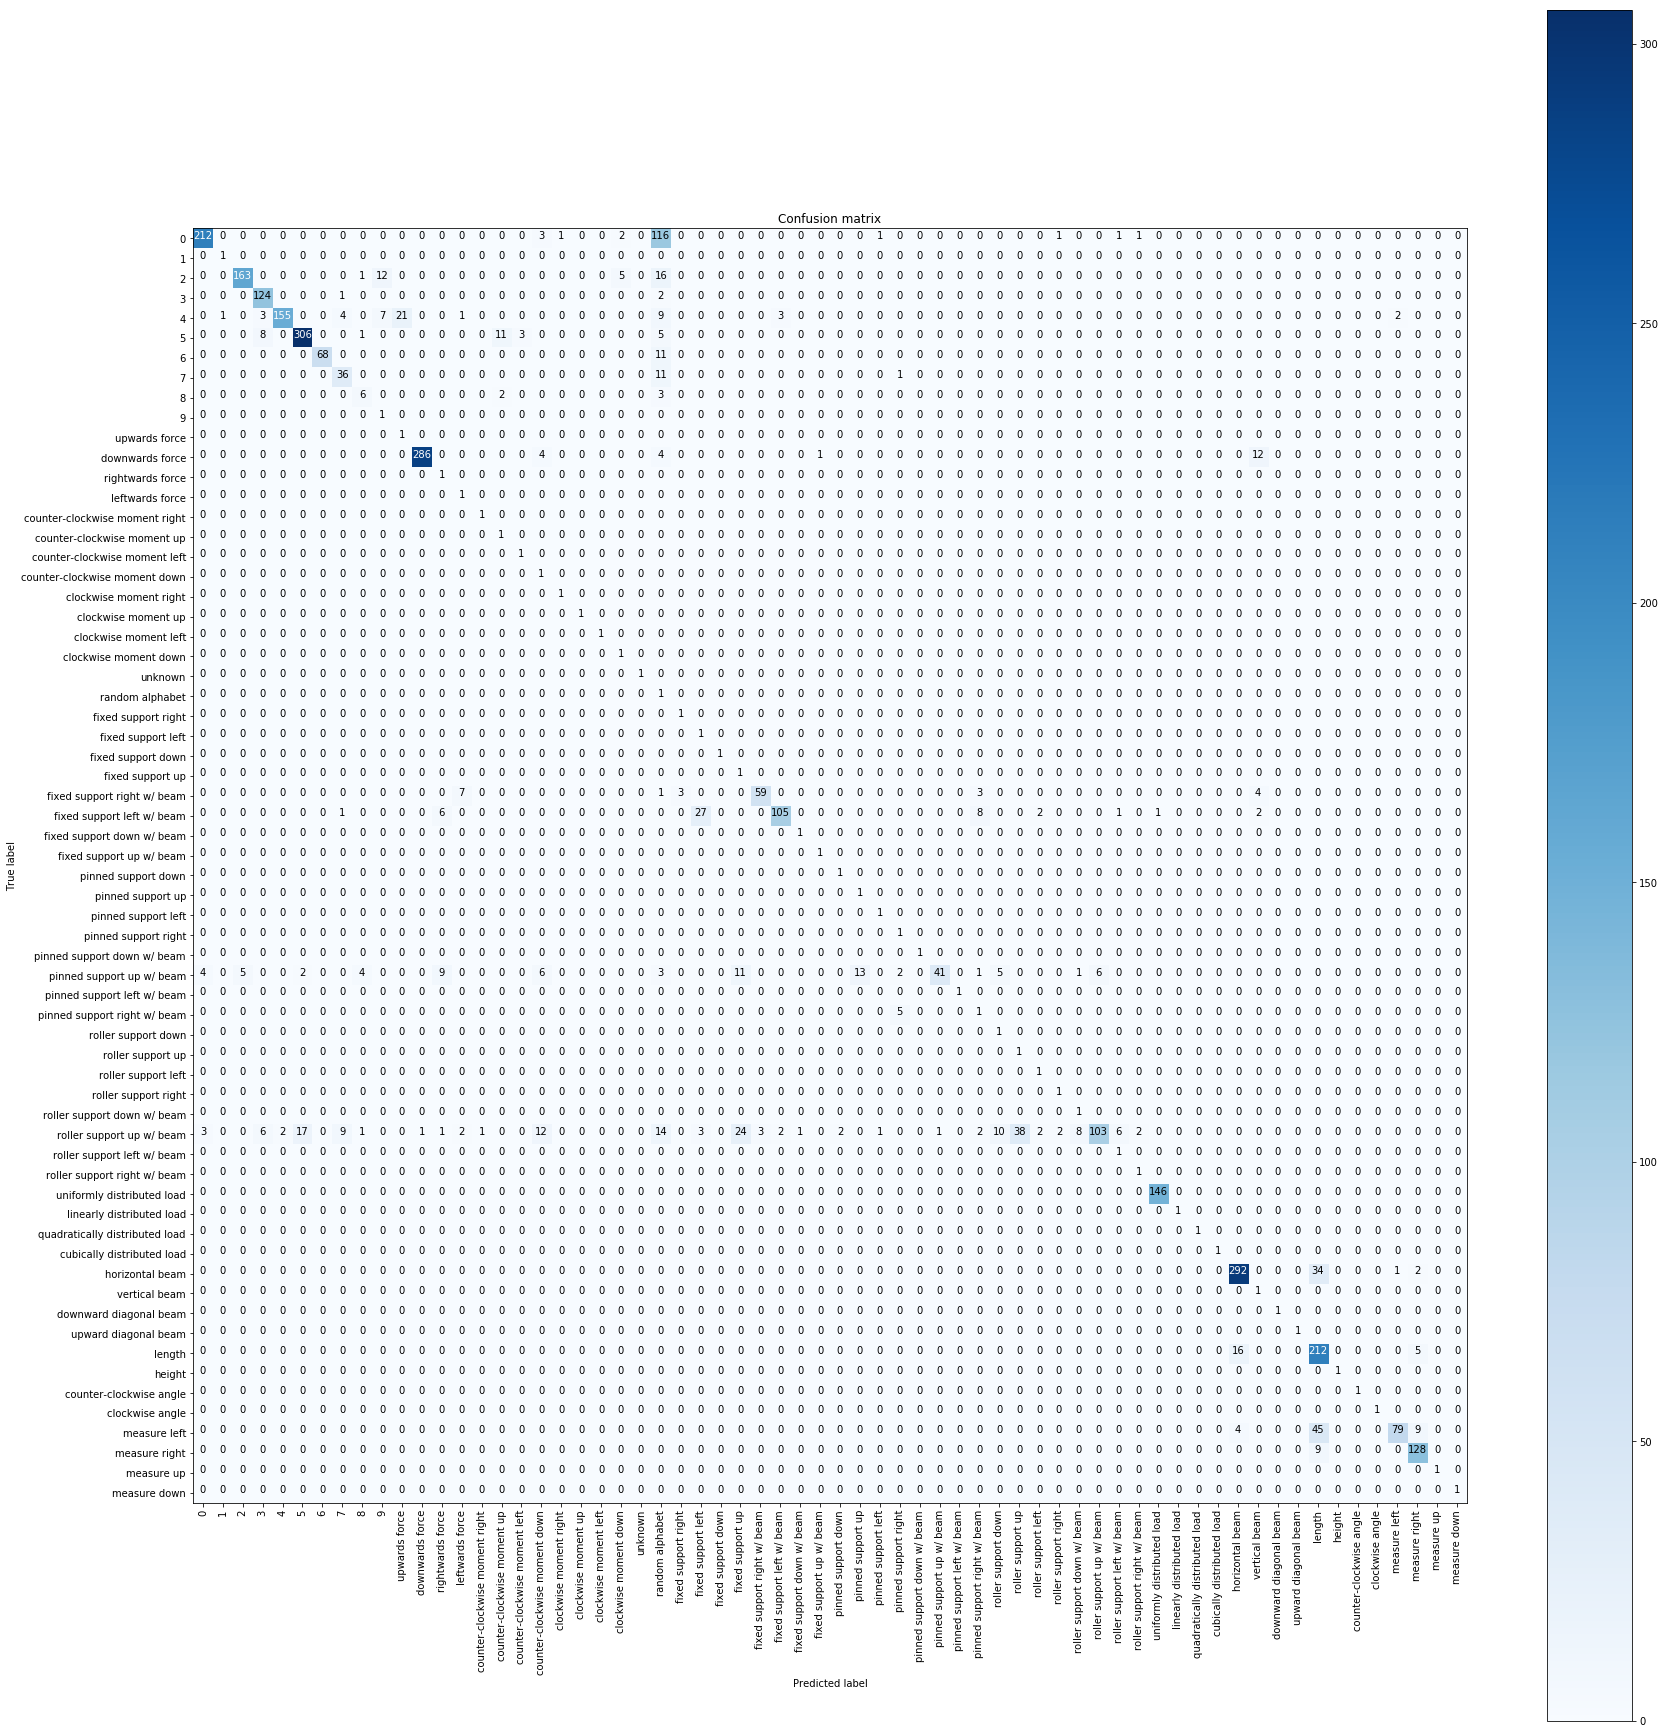

Figure is saved as: C:/Users/JustinSanJuan/Desktop/HKUST/UROP Deep Learning Image-based Structural Analysis/Code/Python/Testing Folder/confusion_matrix_2.png


In [2]:
dataset_PATH = "C:/Users/JustinSanJuan/Desktop/HKUST/UROP Deep Learning Image-based Structural Analysis/Code/Python/Testing Folder/"

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(ground_truth_list,prediction_list)

# Plot non-normalized confusion matrix
from helper_functions import plot_confusion_matrix
from constants import target_names_all
import matplotlib.pyplot as plt
plot_confusion_matrix(cnf_matrix, classes=target_names_all,
                      normalize=False,
                      title='Confusion matrix', 
                      cmap=plt.cm.Blues,PATH=dataset_PATH, name="confusion_matrix_"+str(confusion_matrix_index), verbose = False)


In [3]:
from helper_functions import confusion_matrix_analysis
dataset_PATH = "C:/Users/JustinSanJuan/Desktop/HKUST/UROP Deep Learning Image-based Structural Analysis/Code/Python/Testing Folder/"
name = "confusion_matrix_"+str(confusion_matrix_index)+"_analysis"
min_count = 5
confusion_matrix_analysis(cnf_matrix, dataset_PATH, name, min_count, verbose = False) #Turn verbose on to show data analysis

Data saved as: C:/Users/JustinSanJuan/Desktop/HKUST/UROP Deep Learning Image-based Structural Analysis/Code/Python/Testing Folder/confusion_matrix_2_analysis.txt


### Confusion Matrix Results
#### Results are printed by code.<br>Summary is hand-organized.<br>Error counts less than 5 are ignored.
### Total testing data: [3238]<br>Current Accuracy (non-remapped): (77.3%)<br>Current Accuracy (remapped): (80.4%)


### Major issues are:
#### (5.6%) Several classes --> "random alphabet"<br> (5.1%) Similarly drawn classes<br>(4.2%) Supports --> other support conditions

Total: [182] (5.6%)<br>
[116] 0 --> random alphabet<br>
[16] 2 --> random alphabet<br>
[14] roller support up w/ beam --> random alphabet<br>
[11] 6 --> random alphabet<br>
[11] 7 --> random alphabet<br>
[9] 4 --> random alphabet<br>
[5] 5 --> random alphabet<br>

Total: [164] (5.1%)<br>
[45] measure left --> length<br>
[34] horizontal beam --> length<br>
[21] 4 --> upwards force<br>
[16] length --> horizontal beam<br>
[12] downwards force --> vertical beam<br>
[11] 5 --> counter-clockwise moment up<br>
[7] 4 --> 9<br>
[7] fixed support right w/ beam --> leftwards force<br>
[6] fixed support left w/ beam --> rightwards force<br>
[5] length --> measure right<br>

##### Possible Accuracy (non-remapped): (88.0%)<br>Possible Accuracy (remapped): (91.1%)

Total: [136] (4.2%)<br>
[24] roller support up w/ beam --> fixed support up<br>
[17] roller support up w/ beam --> 5<br>
[12] roller support up w/ beam --> counter-clockwise moment down<br>
[11] pinned support up w/ beam --> fixed support up<br>
[9] pinned support up w/ beam --> rightwards force<br>
[9] roller support up w/ beam --> 7<br>
[9] measure left --> measure right<br>
[9] measure right --> length<br>
[8] fixed support left w/ beam --> pinned support right w/ beam<br>
[6] pinned support up w/ beam --> counter-clockwise moment down<br>
[6] pinned support up w/ beam --> roller support up w/ beam<br>
[6] roller support up w/ beam --> roller support left w/ beam<br>
[5] pinned support up w/ beam --> 2<br>
[5] pinned support up w/ beam --> roller support down<br>
##### Possible Accuracy (non-remapped): (92.2%)<br>Possible Accuracy (remapped): (95.3%)
##### The following are uncategorized errors:
Total: [31] (1.0%)<br>
[12] 2 --> 9<br>
[5] 2 --> clockwise moment down<br>
[6] roller support up w/ beam --> 3<br>
[8] 5 --> 3<br>

#### The following are negligible due to remapping:
Total [101] (3.1%)<br>
[38] roller support up w/ beam --> roller support up<br>
[27] fixed support left w/ beam --> fixed support left<br>
[13] pinned support up w/ beam --> pinned support up<br>
[10] roller support up w/ beam --> roller support down<br>
[8] roller support up w/ beam --> roller support down w/ beam<br>
[5] pinned support right w/ beam --> pinned support right<br>

## Action Plan
### Problem: (5.6%) Several classes --> "random alphabet"<br>Proposed Solution: More training samples<br><br> Problem: (5.1%) Similarly drawn classes<br>Proposed Solution: More training samples | Larger input size (dimensions)<br><br> Problem: (4.2%) Supports --> other support conditions<br> Proposed Solution: More training samples | retrain model with different initialization
